In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

from motiflets.motiflets import *
from motiflets.plotting import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

In [6]:
from motiflets.plotting import *
from scipy.stats import zscore

def generate_rectangular_wave(motif_length):
    return (motif_length,
            np.where(np.arange(motif_length) < motif_length / 2, 1, -1))


def generate_sine_wave(motif_length):
    sine_frequency = 5.0
    duration = 2.0

    # sine_time = np.arange(motif_length)
    t = np.linspace(0, duration, int(motif_length), endpoint=False)

    # Generate sine wave
    return np.sin(2 * np.pi * sine_frequency * t).flatten()


def test_random_walk():
    # Parameters
    ts_length = 1e6
    motif_length = 1000
    motif_cardinality = 10

    mean = 0.0
    std_dev = 1.0

    # Generate random walk
    time_series = np.cumsum(np.random.normal(mean, std_dev, int(ts_length)))
    # time_series = zscore(time_series)

    for i in np.arange(0, motif_cardinality):
        # Implant sine wave into random walk
        sine = generate_sine_wave(motif_length)
        noise = np.random.normal(0.1, size=motif_length) * 0.1

        # Choose the position to insert sine wave
        start = int(i / motif_cardinality * ts_length )
        sine += time_series[start-1]
        time_series[start:start + motif_length] = sine + noise

    ds_name = "Random Walk"
    ml = Motiflets(ds_name=ds_name, series=time_series)
    ml.plot_dataset()
    ml.fit_k_elbow(
        k_max=motif_cardinality+2, motif_length=motif_length)


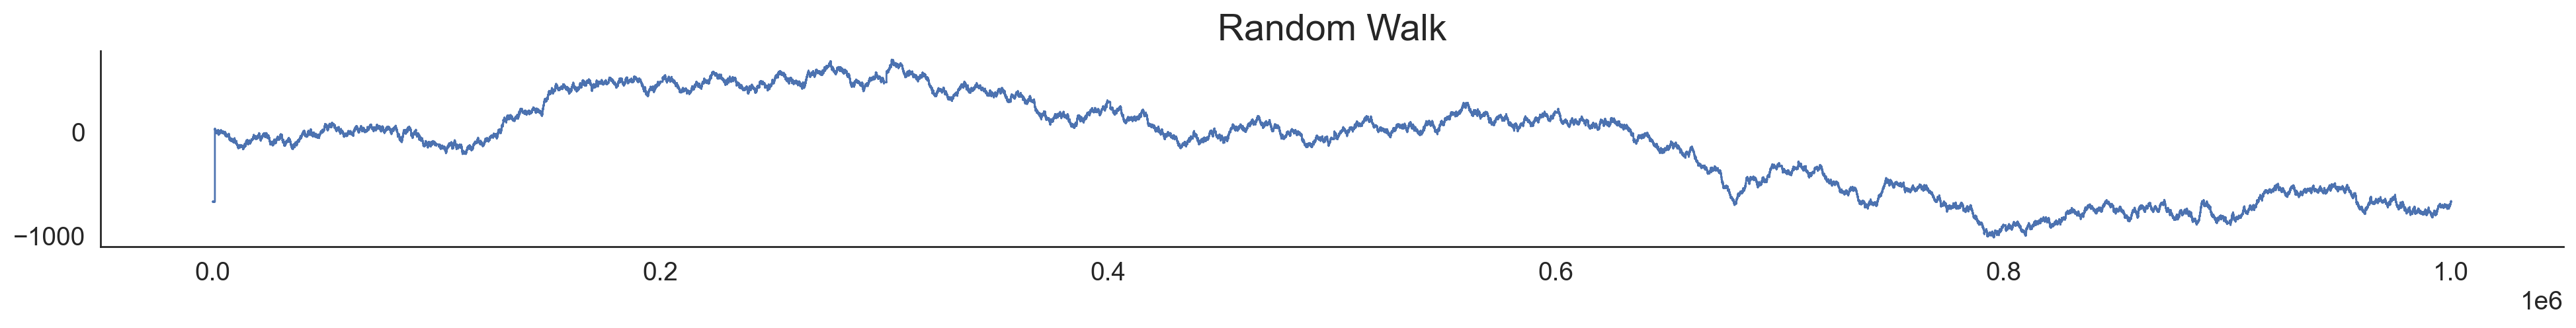

Data 1000000


thread '<unnamed>' panicked at /Users/runner/work/attimo/attimo/src/knn.rs:202:13:
assertion failed: prev_cnt <= new_cnt
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


PanicException: assertion failed: prev_cnt <= new_cnt

In [7]:
test_random_walk()